# TP3: Clase 4

### Para la imagen suministrada implementar un algoritmo que:

1 - Encuentre la posición de los iris en cada
par de ojos y mida su distancia en
píxeles.

In [1]:
# Se importan las librerias a utilizar
import os
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../../utils'))
sys.path.append(module_path)

In [2]:
# Se convierte a escala de grises
def convert_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# Convertir imagenes de BGR a RGB
def convert_RGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

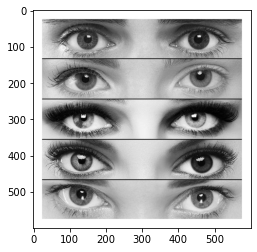

In [153]:
# Se carga la imagen
img = cv.imread('tp3_images/eyes.jpg')
img = convert_gray(img)
plt.imshow(img, cmap='gray')


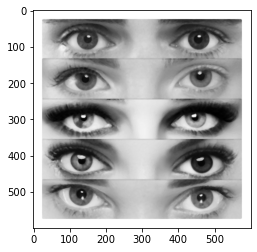

In [53]:
# Se suaviza la imagen 
img = cv.medianBlur(img, 5)
plt.imshow(img, cmap='gray')

In [106]:
# Se obtienen los circulos por transformada de Hough
img_out = img.copy()
circles = cv.HoughCircles(
    image=img,
    method=cv.HOUGH_GRADIENT,
    dp=1, 
    minDist=10,
    param1=90,
    param2=21, 
    minRadius=25, 
    maxRadius=35
)

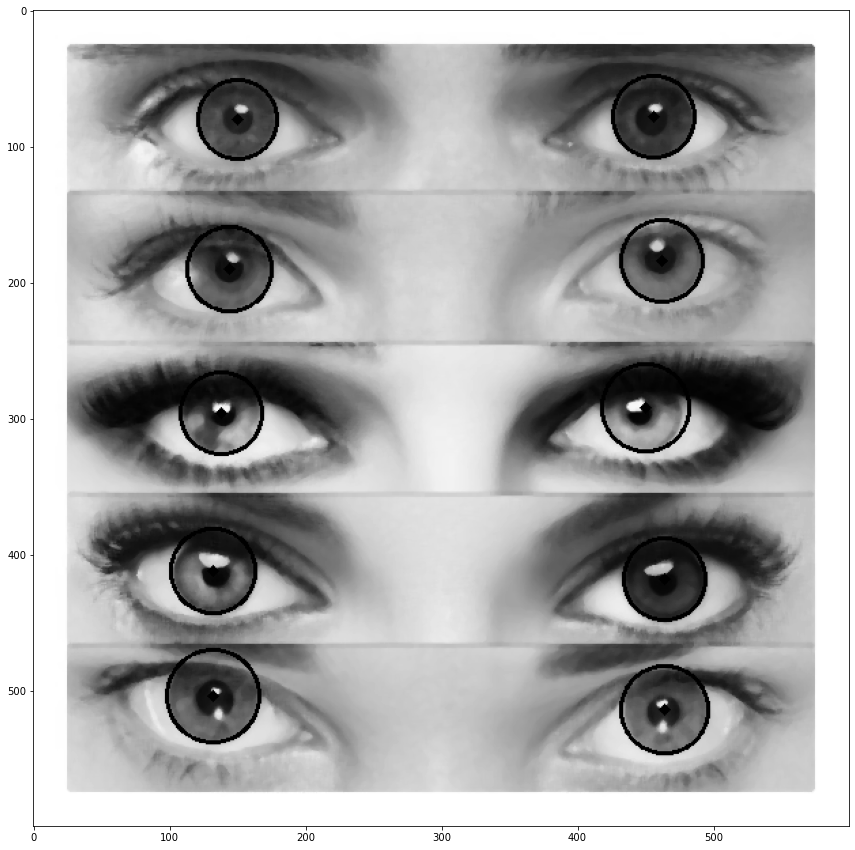

In [105]:
# Se grafican los circulos
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # Dibujamos el círculo externo
    cv.circle(img_out, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Dibujamos el centro del círculo
    cv.circle(img_out, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(15, 15))
plt.imshow(img_out, cmap='gray')

In [104]:
# Se calcula el histograma con las direcciones de maxima magnitud
number_eyes = 5 
bins = [i * img.shape[1] / number_eyes for i in range(number_eyes + 1)]
line = np.digitize(circles[:, :, 1], bins, right=False)

for i in np.unique(line):
    print(f"Eyes number {i}:")
    eyes_cycles = circles[line == i]
    print("Eyes position in image: ")
    print("Position eye 1: {}".format(eyes_cycles[0, :2]))
    print("Position eye 1: {}".format(eyes_cycles[1, :2]))
    print("Distance between eyes: {}".format(abs(int(eyes_cycles[0, 0]) - int(eyes_cycles[1, 0]))))
    


Eyes number 1:
Eyes position in image: 
Position eye 1: [456  78]
Position eye 1: [150  80]
Distance between eyes: 306
Eyes number 2:
Eyes position in image: 
Position eye 1: [144 190]
Position eye 1: [462 184]
Distance between eyes: 318
Eyes number 3:
Eyes position in image: 
Position eye 1: [138 296]
Position eye 1: [450 292]
Distance between eyes: 312
Eyes number 4:
Eyes position in image: 
Position eye 1: [464 418]
Position eye 1: [132 412]
Distance between eyes: 332
Eyes number 5:
Eyes position in image: 
Position eye 1: [132 504]
Position eye 1: [464 514]
Distance between eyes: 332


2 - Encuentre la posición de las pupilas en
cada par de ojos y mida su distancia en
píxeles.

In [172]:
# Se hace un filtro
img_blur = cv.medianBlur(img, 7)

In [174]:

# Se obtienen los circulos por transformada de Hough
img_out = img_blur.copy()
circles = cv.HoughCircles(
    image=img_blur,
    method=cv.HOUGH_GRADIENT,
    dp=1, 
    minDist=50,
    param1=120,
    param2=10, 
    minRadius=11, 
    maxRadius=13
)

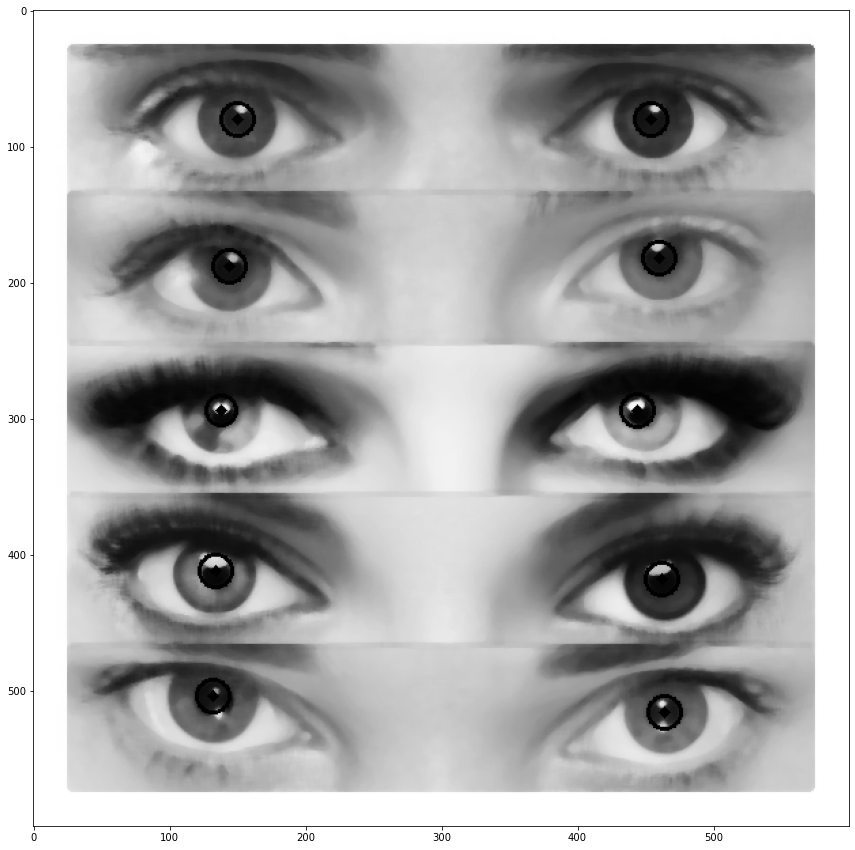

In [176]:

# Se grafican los circulos
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # Dibujamos el círculo externo
    cv.circle(img_out, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Dibujamos el centro del círculo
    cv.circle(img_out, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(15, 15))
plt.imshow(img_out, cmap='gray')

In [177]:
# Se calcula el histograma con las direcciones de maxima magnitud
number_eyes = 5 
bins = [i * img.shape[1] / number_eyes for i in range(number_eyes + 1)]
line = np.digitize(circles[:, :, 1], bins, right=False)

for i in np.unique(line):
    print(f"Eyes number {i}:")
    eyes_cycles = circles[line == i]
    print("Eyes position in image: ")
    print("Position eye 1: {}".format(eyes_cycles[0, :2]))
    print("Position eye 1: {}".format(eyes_cycles[1, :2]))
    print("Distance between eyes: {}".format(abs(int(eyes_cycles[0, 0]) - int(eyes_cycles[1, 0]))))

Eyes number 1:
Eyes position in image: 
Position eye 1: [454  80]
Position eye 1: [150  80]
Distance between eyes: 304
Eyes number 2:
Eyes position in image: 
Position eye 1: [460 182]
Position eye 1: [144 188]
Distance between eyes: 316
Eyes number 3:
Eyes position in image: 
Position eye 1: [444 294]
Position eye 1: [138 294]
Distance between eyes: 306
Eyes number 4:
Eyes position in image: 
Position eye 1: [462 418]
Position eye 1: [134 412]
Distance between eyes: 328
Eyes number 5:
Eyes position in image: 
Position eye 1: [464 516]
Position eye 1: [132 504]
Distance between eyes: 332
